# Investigate the converge performance w.r.t the iteration number
- Author: Yong Lee (yongli.cv@gmail.com)
- Date: Aug 1st, 2021

In [1]:
# perform the experiments
from deformpiv import *
import numpy as np

kernel_methods = ['openpiv', 'opticalflow', 'deeppiv']
warping_methods = ['FDI', 'CDI', 'CDDI', 'FDDI']

case = './PIG/sin_5.0.npz'
runs = np.arange(16) # run number

data = np.load(case)

img1 = data['img1']
img2 = data['img2']
ut, vt = data['u'], data['v']


def compute_error(x, y, u, v):
    if ut.shape != u.shape:
        temp_ut = remap(ut, x, y)
        temp_vt = remap(vt, x, y)
    else:
        temp_ut, temp_vt = ut.copy(), vt.copy()
    err = np.sqrt((u-temp_ut)**2+(v-temp_vt)**2)

    # don't evaluate the error within the image boundary
    err[:3,:], err[-3:,:], err[:,:3], err[:,-3:] = np.nan, np.nan, np.nan, np.nan
    if err.shape[0]>100:
        err[0:30,:], err[-30:,:], err[:,:30], err[:,-30:] = np.nan, np.nan, np.nan, np.nan
    return err


result = []
for run in runs:
    print(f"Computing for number of runs: {run}")
    result.append([])
    for kernel in kernel_methods:
        result[-1].append([])
        for warp in warping_methods:
            config = AttrDict()
            config.pivmethod = kernel
            config.deform = warp
            config.runs = run

            piv = DeformPIV(config)
            x, y, u, v = piv.compute(img1, img2)
            err = compute_error(x, y, u, v)
            rmse = np.sqrt(np.nanmean(err**2))
            result[-1][-1].append([rmse])

result = np.array(result)

Cuda installed! Running on GPU!
unliteflownet load successfully.
Computing for number of runs: 0
Computing for number of runs: 1
Computing for number of runs: 2
Computing for number of runs: 3
Computing for number of runs: 4
Computing for number of runs: 5
Computing for number of runs: 6
Computing for number of runs: 7
Computing for number of runs: 8
Computing for number of runs: 9
Computing for number of runs: 10
Computing for number of runs: 11
Computing for number of runs: 12
Computing for number of runs: 13
Computing for number of runs: 14
Computing for number of runs: 15


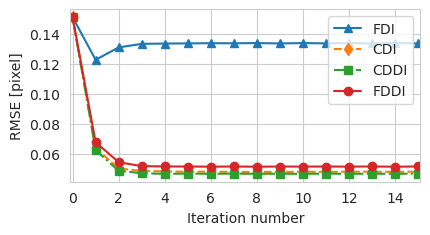

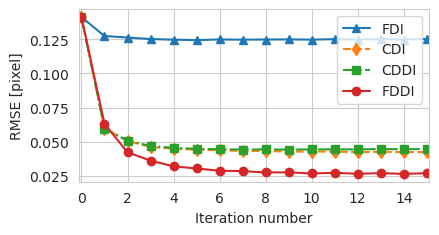

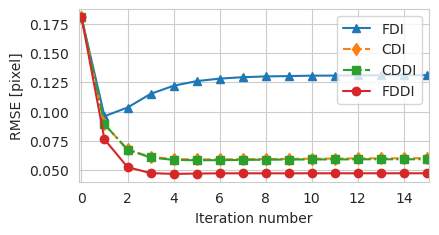

In [2]:
# visualize the results
import seaborn as sns
sns.set_style("whitegrid")

markers = ['-^', '--d', '-.s', '-o']
for i in range(result.shape[1]):
    fig = plt.figure(figsize=(5, 5*0.5))
    data = result[:, i, :, 0]
    for j in range(result.shape[2]):
        plt.plot(runs, result[:, i, j, 0], markers[j], label=warping_methods[j])
    plt.legend(loc=1)
    plt.xlabel("Iteration number")
    plt.ylabel("RMSE [pixel]")
    plt.xlim([runs[0]-0.1,runs[-1]+0.1])
    plt.gcf().subplots_adjust(left=0.2, bottom=0.19)

    plt.grid('on')
    plt.savefig(f"output/{kernel_methods[i]}_runs_error.pdf")

plt.show()     